# DSC-609 Machine Learning
## Michael Albers
### 8/20/2022

## Data Set

The data set consists of sensor data readings of eight subjects (people) while exercising on a stepper (A13).  The 45 features in the data set represent the 45 sensor axes at a particular sample instance. https://archive.ics.uci.edu/ml/datasets/daily+and+sports+activities

## Overview

Use Principal Component Analysis to reduce the number of dimensions in the daily fitness data set which currently has 45 features. The body sensor categories are Torso (T), Right Arm (RA), Left Arm (LA), Right Leg (RL), and Left Leg (LL). Each of these sensor categories has nine sensors.  The total number of sensor points (axes) is 45.

## Read and Inspect Data

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [4]:
stepper_activity = pd.read_csv('data/daily_exercise_stepper_activity.csv')

In [10]:
stepper_activity.columns

Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'RA1', 'RA2',
       'RA3', 'RA4', 'RA5', 'RA6', 'RA7', 'RA8', 'RA9', 'LA1', 'LA2', 'LA3',
       'LA4', 'LA5', 'LA6', 'LA7', 'LA8', 'LA9', 'RL1', 'RL2', 'RL3', 'RL4',
       'RL5', 'RL6', 'RL7', 'RL8', 'RL9', 'LL1', 'LL2', 'LL3', 'LL4', 'LL5',
       'LL6', 'LL7', 'LL8', 'LL9'],
      dtype='object')

In [5]:
stepper_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 45 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T1      60000 non-null  float64
 1   T2      60000 non-null  float64
 2   T3      60000 non-null  float64
 3   T4      60000 non-null  float64
 4   T5      60000 non-null  float64
 5   T6      60000 non-null  float64
 6   T7      60000 non-null  float64
 7   T8      60000 non-null  float64
 8   T9      60000 non-null  float64
 9   RA1     60000 non-null  float64
 10  RA2     60000 non-null  float64
 11  RA3     60000 non-null  float64
 12  RA4     60000 non-null  float64
 13  RA5     60000 non-null  float64
 14  RA6     60000 non-null  float64
 15  RA7     60000 non-null  float64
 16  RA8     60000 non-null  float64
 17  RA9     60000 non-null  float64
 18  LA1     60000 non-null  float64
 19  LA2     60000 non-null  float64
 20  LA3     60000 non-null  float64
 21  LA4     60000 non-null  float64
 22

In [8]:
stepper_activity.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
T1,60000.0,7.513283,6.106263,-15.753000,6.489375,8.559950,10.208250,31.22500
T2,60000.0,0.249728,2.858277,-25.755000,-1.142300,-0.223960,0.956330,15.83800
T3,60000.0,1.104847,2.750512,-62.664000,-0.667640,1.033750,2.657325,34.44600
T4,60000.0,0.001000,0.604311,-6.829700,-0.351255,0.001402,0.361503,10.96400
T5,60000.0,0.013090,0.537085,-6.901400,-0.240042,0.033837,0.280155,5.83260
T6,60000.0,-0.004711,0.302025,-2.512300,-0.157222,0.001279,0.146022,3.43410
T7,60000.0,-0.627057,0.462032,-1.020500,-0.873140,-0.759215,-0.693745,0.81326
T8,60000.0,-0.038179,0.164452,-0.509840,-0.157043,-0.050454,0.059950,0.72283
T9,60000.0,-0.546669,0.185364,-0.944560,-0.664555,-0.583420,-0.448040,0.54425
RA1,60000.0,3.554371,2.881314,-14.385000,1.635075,3.881100,5.742250,37.08900


In [11]:
stepper_activity.head(10)

,T1,T2,T3,T4,T5,T6,T7,T8,T9,RA1,...,RL9,LL1,LL2,LL3,LL4,LL5,LL6,LL7,LL8,LL9
0,8.5370,0.16942,1.8751,-0.333680,-0.340950,0.079021,-0.70261,-0.25852,-0.59242,6.83990,...,-0.38973,-9.0840,-1.46100,-0.81777,-0.86097,0.024859,0.71324,0.70895,0.34430,0.57457
1,9.3906,-0.32832,2.3633,-0.156250,-0.219140,0.004049,-0.70960,-0.25274,-0.58763,5.22860,...,-0.40744,-8.7498,-3.07550,-0.98083,-0.59995,-0.221950,0.78322,0.70115,0.29672,0.58648
2,9.4116,-0.63955,2.3390,-0.042168,0.025051,0.097992,-0.70949,-0.25604,-0.58572,4.09870,...,-0.42524,-9.2611,-3.36640,-2.57400,-0.40270,0.022696,0.42732,0.69472,0.25458,0.59648
3,11.4220,-0.46698,3.3253,0.229030,-0.181110,-0.093838,-0.71701,-0.25414,-0.58106,3.70450,...,-0.44049,-20.0420,-1.58630,0.52078,0.61991,0.138260,0.53894,0.67546,0.24674,0.59707
4,18.3360,2.27760,3.4105,0.527090,-1.250600,-0.436430,-0.73504,-0.27142,-0.55301,0.42828,...,-0.44574,-15.2800,-1.51910,-1.56510,0.26488,0.163930,0.29631,0.67801,0.24276,0.58767
5,21.7790,2.29430,3.4367,-0.192790,0.093279,-0.384480,-0.73741,-0.28392,-0.54011,1.54260,...,-0.44598,-15.7250,0.60137,-0.65546,0.63825,-0.254010,0.73593,0.68036,0.24030,0.58660
6,13.3330,1.07380,5.1107,-0.945200,1.108100,-0.233800,-0.71498,-0.27386,-0.57129,4.05970,...,-0.42083,-13.2150,-3.41290,-1.08710,0.39792,-0.289040,0.23694,0.69663,0.23876,0.56897
7,7.3538,-0.22744,3.4602,-0.658150,0.963230,-0.527170,-0.68772,-0.26191,-0.60714,2.50390,...,-0.39755,-10.4770,-4.67490,-2.74010,0.34940,-0.087779,-0.22319,0.71450,0.24997,0.55540
8,7.2657,-0.82762,1.7993,-1.023200,0.371010,-0.527050,-0.67285,-0.24904,-0.62426,3.62310,...,-0.37986,-11.1290,-1.26340,-1.19540,0.16203,0.085351,-0.44752,0.72729,0.26905,0.54112
9,9.4074,-1.51410,2.4378,-0.835590,-0.569010,-0.175980,-0.67450,-0.23177,-0.62942,5.70810,...,-0.37446,-10.9340,-2.49680,0.92621,0.22269,-0.333350,-0.45952,0.74620,0.29047,0.51996


## Preprocessing

### Partition Dataframe by sensor category

The main dataframe has 45 features which are categorized by Torso, Right Arm, Left Arm, Right Leg, Left Leg. 

- Features 1 to 9: Torso 
- Features 10 to 18: Right Arm   
- Features 19 to 27: Left Arm 
- Features 28 to 36: Right Leg
- Features 37 to 45: Left Leg

The stepper_activity dataframe will be partitioned into three new dataframes:
1. Torso (Torso sensor readings)
2. Upper body (Right and Left Arm sensor readings)
3. Lower body (Right and Left Leg sensor readings)


In [16]:
torso_df = stepper_activity[['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9']]

In [17]:
torso_df.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9
0,8.5370,0.16942,1.8751,-0.333680,-0.340950,0.079021,-0.70261,-0.25852,-0.59242
1,9.3906,-0.32832,2.3633,-0.156250,-0.219140,0.004049,-0.70960,-0.25274,-0.58763
2,9.4116,-0.63955,2.3390,-0.042168,0.025051,0.097992,-0.70949,-0.25604,-0.58572
3,11.4220,-0.46698,3.3253,0.229030,-0.181110,-0.093838,-0.71701,-0.25414,-0.58106
4,18.3360,2.27760,3.4105,0.527090,-1.250600,-0.436430,-0.73504,-0.27142,-0.55301


In [18]:
upper_body_df = stepper_activity[['RA1', 'RA2', 'RA3', 'RA4', 'RA5', 'RA6', 'RA7', 'RA8', 'RA9', 'LA1', 'LA2', 'LA3', 'LA4', 'LA5', 'LA6', 'LA7', 'LA8', 'LA9']]

In [19]:
upper_body_df.head()

,RA1,RA2,RA3,RA4,RA5,RA6,RA7,RA8,RA9,LA1,LA2,LA3,LA4,LA5,LA6,LA7,LA8,LA9
0,6.83990,6.4814,4.8958,-1.954700,0.28264,-1.1951,0.085967,-1.02170,-0.38784,7.5061,-2.0096,5.2182,0.16254,0.63283,1.19410,-0.22282,0.29104,-0.62314
1,5.22860,2.5644,5.7162,0.130320,0.52802,-1.2384,0.144290,-1.00210,-0.42389,7.7603,-2.8525,5.9702,0.29757,0.59590,1.13760,-0.18995,0.29242,-0.62640
2,4.09870,8.6624,5.1879,0.614690,0.56314,-1.4265,0.205040,-1.01320,-0.39899,6.9148,-2.5459,5.3360,0.23218,0.53160,1.11780,-0.15574,0.29399,-0.62821
3,3.70450,8.4905,5.6416,-0.279470,0.45964,-1.2437,0.276110,-0.99699,-0.42347,7.8408,-4.2513,5.8662,0.23629,0.49399,1.01710,-0.12182,0.29195,-0.63081
4,0.42828,9.9652,7.5724,-0.057309,0.28831,-0.4732,0.314930,-0.98355,-0.43902,6.8672,-4.1616,7.2582,-0.41147,0.29261,0.67918,-0.10166,0.29959,-0.62848


In [20]:
lower_body_df = stepper_activity[['RL1','RL2','RL3','RL4','RL5','RL6','RL7','RL8','RL9','LL1','LL2','LL3','LL4','LL5','LL6','LL7','LL8','LL9']]

In [21]:
lower_body_df.head()

,RL1,RL2,RL3,RL4,RL5,RL6,RL7,RL8,RL9,LL1,LL2,LL3,LL4,LL5,LL6,LL7,LL8,LL9
0,-9.7283,1.37510,1.53860,-0.893670,-0.470890,1.5504,0.90957,-0.30397,-0.38973,-9.0840,-1.4610,-0.81777,-0.86097,0.024859,0.71324,0.70895,0.34430,0.57457
1,-9.8465,1.21630,1.73150,-0.401370,-0.555930,1.5922,0.90414,-0.35692,-0.40744,-8.7498,-3.0755,-0.98083,-0.59995,-0.221950,0.78322,0.70115,0.29672,0.58648
2,-8.6836,1.68580,1.76190,0.036333,-0.310650,1.4696,0.88540,-0.41393,-0.42524,-9.2611,-3.3664,-2.57400,-0.40270,0.022696,0.42732,0.69472,0.25458,0.59648
3,-6.9423,-0.29871,0.89864,0.002874,-0.329240,1.2845,0.86510,-0.47076,-0.44049,-20.0420,-1.5863,0.52078,0.61991,0.138260,0.53894,0.67546,0.24674,0.59707
4,-7.8905,0.54239,-0.26927,0.108610,-0.032961,0.2120,0.85560,-0.49510,-0.44574,-15.2800,-1.5191,-1.56510,0.26488,0.163930,0.29631,0.67801,0.24276,0.58767


### Standardize features

In [22]:
torso_scaled = StandardScaler().fit_transform(torso_df)

In [23]:
upper_body_scaled = StandardScaler().fit_transform(upper_body_df)

In [24]:
lower_body_scaled = StandardScaler().fit_transform(lower_body_df)

In [25]:
torso_scaled[:5]

array([[ 0.16765174, -0.02809705,  0.28004233, -0.55382502, -0.65919422,
         0.27723674, -0.16352548, -1.33986038, -0.24681931],
       [ 0.3074438 , -0.20223837,  0.45753802, -0.26021562, -0.43239404,
         0.02900357, -0.17865443, -1.30471302, -0.22097799],
       [ 0.31088292, -0.31112655,  0.44870323, -0.07143386,  0.02226947,
         0.34004994, -0.17841635, -1.32477985, -0.21067383],
       [ 0.64012137, -0.25075052,  0.80729396,  0.37734189, -0.36158532,
        -0.29510143, -0.19469242, -1.31322622, -0.18553384],
       [ 1.77241081,  0.70947931,  0.83827026,  0.87056861, -2.35288755,
        -1.42942755, -0.23371604, -1.41830344, -0.03420839]])

In [26]:
upper_body_scaled[:5]

array([[ 1.14029775, -0.15394431,  0.29009221, -4.04927707,  0.41703007,
        -1.12587443, -1.21980582, -1.93554181, -0.9873558 ,  1.21945207,
         1.60670233, -0.36720949,  0.3278116 ,  0.80776915,  1.24449592,
        -0.86392145, -0.96579457, -0.24250976],
       [ 0.5810691 , -1.88975543,  0.532994  ,  0.22750359,  0.77421087,
        -1.16650217, -1.05729268, -1.87802845, -1.08947892,  1.30357412,
         1.2268407 , -0.01335248,  0.57650847,  0.76097631,  1.18612067,
        -0.75017401, -0.95576865, -0.26948931],
       [ 0.18891837,  0.8125617 ,  0.37657638,  1.22104046,  0.82533235,
        -1.34299358, -0.88801686, -1.91059979, -1.01894173,  1.02377399,
         1.36501317, -0.31177816,  0.45607384,  0.67950381,  1.1656635 ,
        -0.63178946, -0.94436235, -0.28446876],
       [ 0.05210466,  0.73638454,  0.51090664, -0.61305523,  0.67467536,
        -1.17147508, -0.68998505, -1.8630339 , -1.08828914,  1.33021387,
         0.59645698, -0.06229015,  0.4636436 ,  0.631

In [27]:
lower_body_scaled[:5]

array([[-0.07947908, -0.2359665 ,  1.52902406, -1.34423582, -1.05835539,
         1.29648057,  1.06302512,  0.16447899, -0.6354808 ,  0.05216558,
         0.53928967,  0.26101507, -1.21584392,  0.07732387,  0.56911408,
         0.19114827, -0.94523265,  1.02441482],
       [-0.12164886, -0.28842379,  1.63999716, -0.61313575, -1.24819404,
         1.33125643,  1.02421376, -0.04019783, -0.70978584,  0.17846617,
         0.02088622,  0.14982697, -0.8401299 , -0.60173762,  0.62473388,
         0.13234853, -1.15369378,  1.08374761],
       [ 0.2932347 , -0.13333123,  1.65748592,  0.03688395, -0.70064435,
         1.22925833,  0.89026812, -0.26056847, -0.78446848, -0.0147639 ,
        -0.07251952, -0.93653102, -0.55620687,  0.07137267,  0.34186613,
         0.08387644, -1.33832077,  1.13356524],
       [ 0.9144719 , -0.78888553,  1.16086262, -0.01280502, -0.74214366,
         1.07526282,  0.74517225, -0.48024333, -0.8484522 , -4.08907253,
         0.49905681,  1.17375162,  0.91574514,  0.389

## PCA Model

In [41]:
# Initialize PCA model
pca = PCA(n_components=3)

In [42]:
# Get two principal components for the torso data.
torso_pca = pca.fit_transform(torso_scaled)

In [43]:
pca.explained_variance_ratio_

array([0.39047376, 0.15038186, 0.13127124])

In [45]:
# Transform PCA data to a DataFrame
torso_pca_df = pd.DataFrame(data=torso_pca, columns=["torso_pc_1", "torso_pc_2", "torso_pc_3"])

In [46]:
torso_pca_df.head()

,torso_pc_1,torso_pc_2,torso_pc_3
0,-0.430188,0.241725,0.073026
1,-0.324636,-0.060011,0.029532
2,-0.283456,0.194592,0.081460
3,-0.253755,-0.695199,-0.048433
4,-0.088374,-2.437564,-0.041949


In [48]:
# Initialize PCA model for upper body features
pca_ub = PCA(n_components=3)

In [49]:
upper_body_pca = pca_ub.fit_transform(upper_body_scaled)

In [50]:
pca_ub.explained_variance_ratio_

array([0.2722754 , 0.17274519, 0.15124159])

In [51]:
upper_body_pca_df = pd.DataFrame(data=upper_body_pca, columns=['upperbody_pc_1', 'upperbody_pc_2', 'upperbody_pc_3'])

In [52]:
upper_body_pca_df.head()

,upperbody_pc_1,upperbody_pc_2,upperbody_pc_3
0,-3.175552,0.890645,-1.913204
1,-3.236120,1.460878,-1.923411
2,-2.125316,0.726016,-1.921644
3,-1.860128,0.733580,-1.743546
4,-0.786847,1.239431,-0.953771


In [53]:
pca_lb = PCA(n_components=3)

In [54]:
lower_body_pca = pca_lb.fit_transform(lower_body_scaled)

In [55]:
pca_lb.explained_variance_ratio_

array([0.19893942, 0.12350207, 0.11181929])

In [56]:
lower_body_pca_df = pd.DataFrame(data=lower_body_pca, columns=['lowerbody_pc_1', 'lowerbody_pc_2', 'lowerbody_pc_3'])

In [57]:
lower_body_pca_df.head()

,lowerbody_pc_1,lowerbody_pc_2,lowerbody_pc_3
0,0.186312,-2.903347,-0.749306
1,0.142682,-2.897501,-0.846614
2,-0.319292,-2.307817,-1.297542
3,-0.993344,-1.754522,-2.300328
4,-0.882949,-0.981694,-2.094371


### Merge PCA dataframes

In [58]:
merged_df = pd.merge(torso_pca_df, upper_body_pca_df, left_index=True, right_index=True)

In [60]:
combined_pca_df = pd.merge(merged_df, lower_body_pca_df, left_index=True, right_index=True)

In [61]:
combined_pca_df.head()

,torso_pc_1,torso_pc_2,torso_pc_3,upperbody_pc_1,upperbody_pc_2,upperbody_pc_3,lowerbody_pc_1,lowerbody_pc_2,lowerbody_pc_3
0,-0.430188,0.241725,0.073026,-3.175552,0.890645,-1.913204,0.186312,-2.903347,-0.749306
1,-0.324636,-0.060011,0.029532,-3.236120,1.460878,-1.923411,0.142682,-2.897501,-0.846614
2,-0.283456,0.194592,0.081460,-2.125316,0.726016,-1.921644,-0.319292,-2.307817,-1.297542
3,-0.253755,-0.695199,-0.048433,-1.860128,0.733580,-1.743546,-0.993344,-1.754522,-2.300328
4,-0.088374,-2.437564,-0.041949,-0.786847,1.239431,-0.953771,-0.882949,-0.981694,-2.094371


## K-Means Model

> Implement a KMeans clustering model based on the 9 principal components created from the original data set

In [63]:
km_model = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=10, random_state=0)

In [64]:
km_model.fit(combined_pca_df)

KMeans(max_iter=100, n_clusters=3, random_state=0)

In [65]:
pred_clusters = km_model.predict(combined_pca_df)

In [66]:
combined_pca_df["class"] = km_model.labels_

In [67]:
combined_pca_df.head()

,torso_pc_1,torso_pc_2,torso_pc_3,upperbody_pc_1,upperbody_pc_2,upperbody_pc_3,lowerbody_pc_1,lowerbody_pc_2,lowerbody_pc_3,class
0,-0.430188,0.241725,0.073026,-3.175552,0.890645,-1.913204,0.186312,-2.903347,-0.749306,0
1,-0.324636,-0.060011,0.029532,-3.236120,1.460878,-1.923411,0.142682,-2.897501,-0.846614,0
2,-0.283456,0.194592,0.081460,-2.125316,0.726016,-1.921644,-0.319292,-2.307817,-1.297542,0
3,-0.253755,-0.695199,-0.048433,-1.860128,0.733580,-1.743546,-0.993344,-1.754522,-2.300328,0
4,-0.088374,-2.437564,-0.041949,-0.786847,1.239431,-0.953771,-0.882949,-0.981694,-2.094371,0


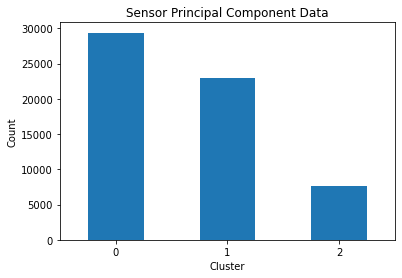

In [92]:
combined_pca_df["class"].value_counts().plot(kind='bar', rot=0)
plt.title("Sensor Principal Component Data")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

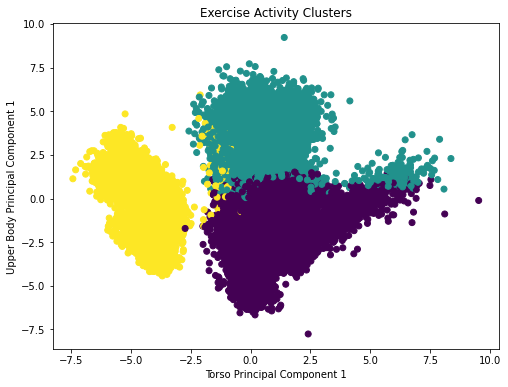

In [124]:
plt.figure(figsize=(8,6))
plt.scatter(x=combined_pca_df['torso_pc_1'], y=combined_pca_df['upperbody_pc_1'], c=combined_pca_df['class'])
plt.xlabel('Torso Principal Component 1')
plt.ylabel('Upper Body Principal Component 1')
plt.title('Exercise Activity Clusters')
plt.show()

## Summary

- The three torso principal components preserves about `57%` of the original dataset

- The three upper body principal components preserves about `49%` of the original dataset

- The three lower body principal components preserves about `43%` of the original data

## References and Citations

K. Altun, B. Barshan, and O. Tunçel,
``Comparative study on classifying human activities with miniature inertial and magnetic sensors,''
Pattern Recognition, 43(10):3605-3620, October 2010.

B. Barshan and M. C. Yüksek, ``Recognizing daily and sports activities in two open source machine learning environments using body-worn sensor units,'' The Computer Journal, 57(11):1649--1667, November 2014.

K. Altun and B. Barshan,
``Human activity recognition using inertial/magnetic sensor units,'' Proceedings First International Workshop on Human Behavior Understanding (in conjunction with the 20th Int. Conf. on Pattern Recognition), 22 August 2010, Istanbul, Turkey,
A. A. Salah, T. Gevers, N. Sebe, A. Vinciarelli (editors), HBU 2010, LNCS 6219, pp.38-51, Springer: Berlin, Heidelberg, 2010.